NISHANT GOLAKIYA 60009220150

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Breast_cancer_data (1).csv")

In [ ]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


<Axes: xlabel='diagnosis', ylabel='count'>

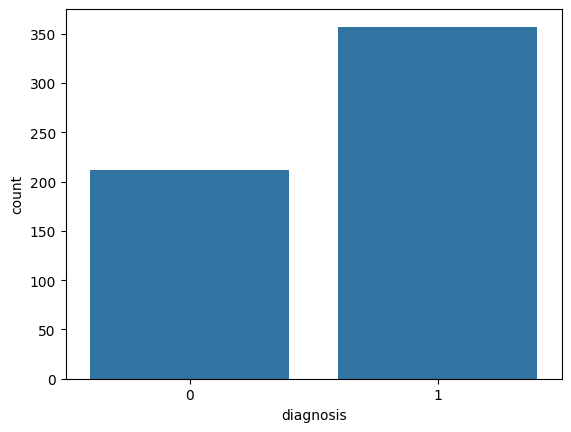

In [ ]:
sns.countplot(x='diagnosis',data=df)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib.pyplot as plt

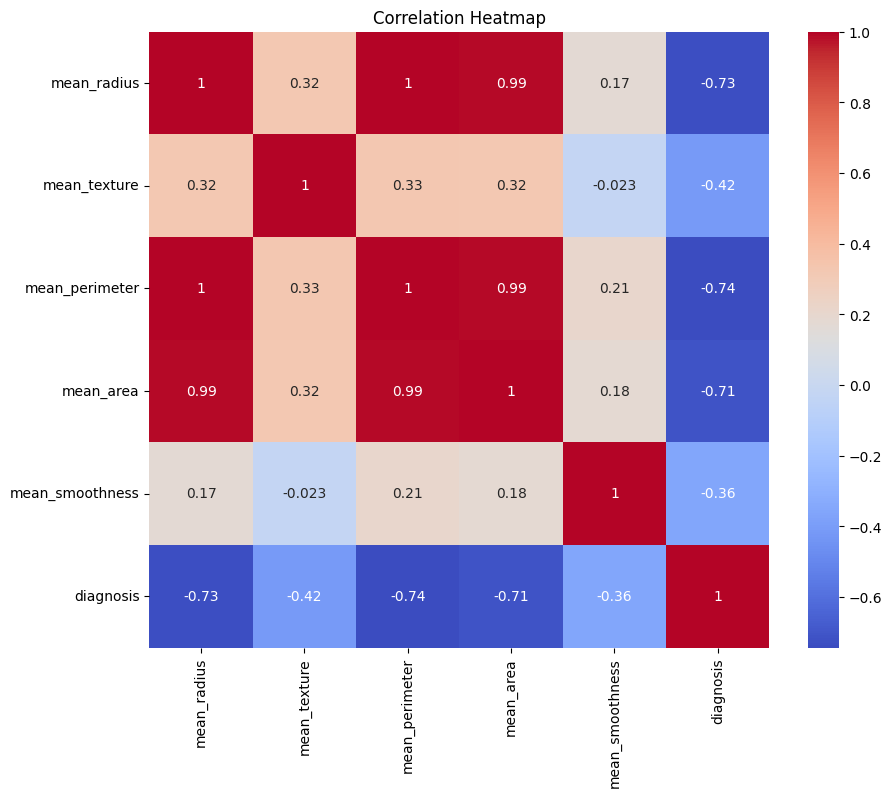

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

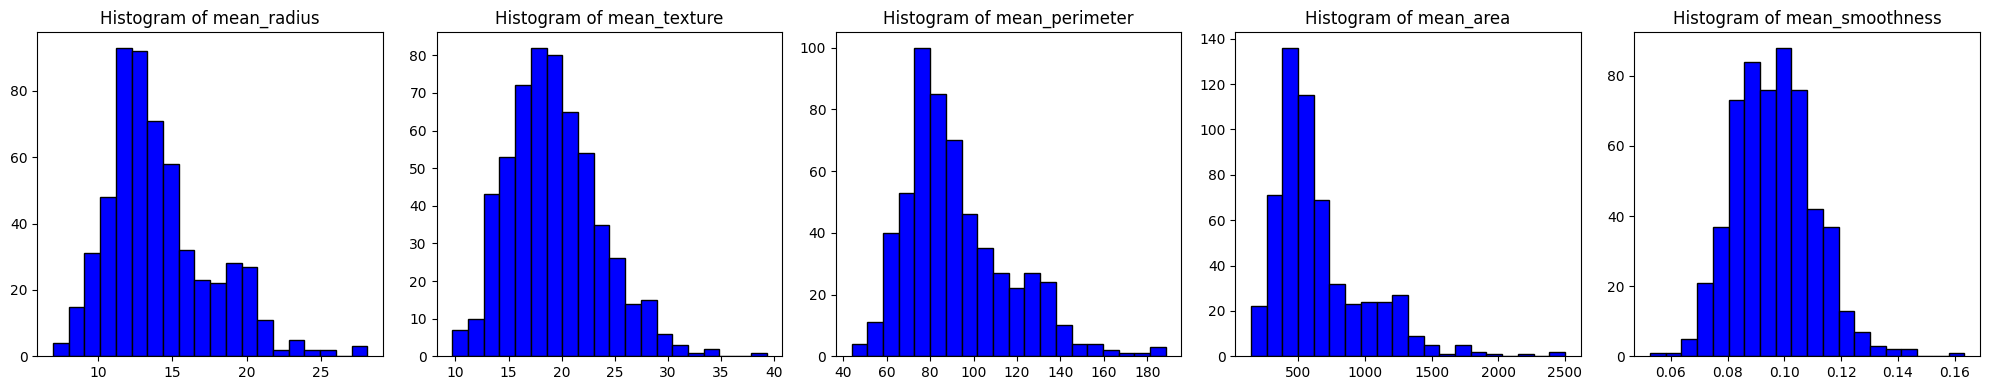

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset and 'features' is a list of feature names to plot histograms for
features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']

# Create subplots for each feature
fig, axs = plt.subplots(1, len(features), figsize=(20, 4))

for i, feature in enumerate(features):
    axs[i].hist(df[feature], bins=20, edgecolor='black', facecolor='blue')
    axs[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
def get_prior(df, Y):
    class_counts = df[Y].value_counts(normalize=True)
    prior = class_counts.sort_index().tolist()
    return prior

In [ ]:
get_prior(df,"mean_radius")[:5]

[0.0017574692442882249,
 0.0017574692442882249,
 0.0017574692442882249,
 0.0017574692442882249,
 0.0017574692442882249]

In [ ]:
def likelihood_g(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_y

In [ ]:
def naive_bayes_g(df, X, Y):
    feat = list(df.columns)[:-1]
    prior = get_prior(df, Y)
    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        L = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(feat)):
                L[j] =L[j]* likelihood_g(df, feat[i], x[i], Y, labels[j])
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = L[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [ ]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=41)
x_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_g(train, X=x_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 2 72]]
0.9599999999999999


In [ ]:
dataset=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
X = dataset. iloc[:, [1, 2, 3]]. values
Y = dataset. iloc[:, -1]. values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
X[:,0]=le.fit_transform(X[:,0])

In [ ]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X=sc.fit_transform(X)

In [ ]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [ ]:
from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=train_test_split(dataset,test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier. fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred=classifier.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(Y_pred,Y_test)

array([[48,  6],
       [ 2, 24]])

In [ ]:
f1_score(Y_pred,Y_test)

0.8571428571428571

In [ ]:
df=pd.read_csv("/content/german_credit_data.csv")

In [ ]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Sex']=le.fit_transform(df['Sex'])
df['Housing']=le.fit_transform(df['Housing'])
df['Saving accounts']=df['Saving accounts'].fillna('NA')
df['Saving accounts']=le.fit_transform(df['Saving accounts'])
df['Checking account']=df['Checking account'].fillna('NA')
df['Checking account']=le.fit_transform(df['Checking account'])
df['Purpose']=le.fit_transform(df['Purpose'])
df['Risk']=le.fit_transform(df['Risk'])

In [ ]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,1,1169,6,5,1
1,1,22,0,2,1,1,2,5951,48,5,0
2,2,49,1,1,1,1,0,2096,12,3,1
3,3,45,1,2,0,1,1,7882,42,4,1
4,4,53,1,2,0,1,1,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,0,1,1,1,0,1736,12,4,1
996,996,40,1,3,1,1,1,3857,30,1,1
997,997,38,1,2,1,1,0,804,12,5,1
998,998,23,1,2,0,1,1,1845,45,5,0


In [ ]:
X=df.drop(columns='Risk')
Y=df['Risk']

In [ ]:
X

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1,2,1,0,1,1169,6,5
1,1,22,0,2,1,1,2,5951,48,5
2,2,49,1,1,1,1,0,2096,12,3
3,3,45,1,2,0,1,1,7882,42,4
4,4,53,1,2,0,1,1,4870,24,1
...,...,...,...,...,...,...,...,...,...,...
995,995,31,0,1,1,1,0,1736,12,4
996,996,40,1,3,1,1,1,3857,30,1
997,997,38,1,2,1,1,0,804,12,5
998,998,23,1,2,0,1,1,1845,45,5


In [ ]:
Y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()
nb.fit(X_train,Y_train)
Y_pred=nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(Y_pred,Y_test)

array([[ 15,  13],
       [ 34, 138]])

In [ ]:
f1_score(Y_pred,Y_test)

0.8544891640866873